In [ ]:
!nvidia-smi

In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
import os, sys
from config import config as configs
from utils import saver
import importlib
from pprint import pprint
from datasets import HourglassHeatmapDataset as datasets
from matplotlib import pyplot as plt
importlib.reload(configs)
import numpy as np
%matplotlib inline

In [4]:
config = saver.get_config_dump('hourglass_new1')

In [5]:
pprint(config)

{'dataset': {'augmentations': [],
             'img_size': 512,
             'root': '/home/semyon/cardiomethry/ChestXrayIndex',
             'scale': True,
             'sigma': 8,
             'test': {'batch_size': 16,
                      'csv_path': '/home/semyon/projects/cardiomethry/ChestXrayIndex/test.csv',
                      'shuffle': False},
             'train': {'batch_size': 16,
                       'csv_path': '/home/semyon/projects/cardiomethry/ChestXrayIndex/train.csv',
                       'shuffle': True},
             'transforms': [{'name': 'ToTensorV2'}],
             'val': {'batch_size': 16,
                     'csv_path': '/home/semyon/projects/cardiomethry/ChestXrayIndex/val.csv',
                     'shuffle': False}},
 'model': {'final_activation': [{'name': 'ReLU'}],
           'hourglass_inter_channels': 5,
           'hourglass_inter_increase': 4,
           'hourglass_stack': 1,
           'in_channels': 3,
           'load_state': 0,
         

In [6]:
train_loader = datasets.get_DataLoader(config, phase="train")

In [7]:
sample = next(iter(train_loader))

In [8]:
idx = 0
img = sample['image'][idx]
target = sample['target'][idx]

In [9]:
def to_np(a):
    a = a.cpu().numpy()
    a = np.transpose(a, (1,2,0))
    return a

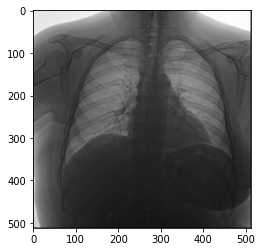

In [10]:
plt.imshow(to_np(img))

In [11]:
target.shape

torch.Size([12, 512, 512])

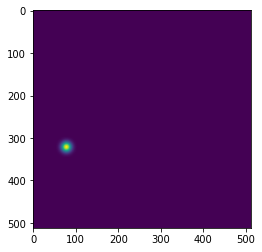

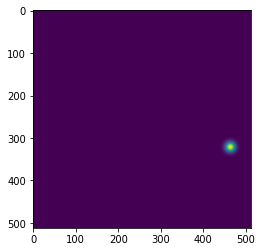

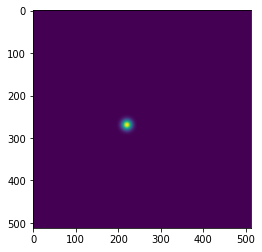

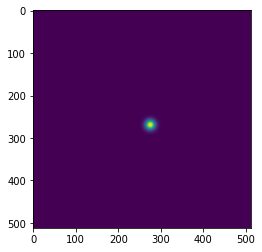

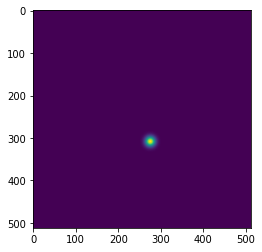

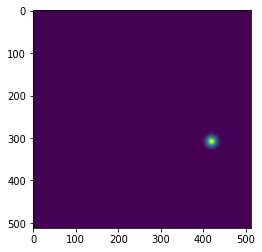

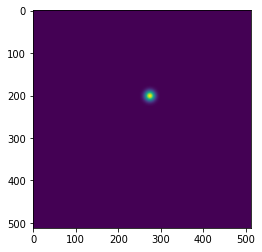

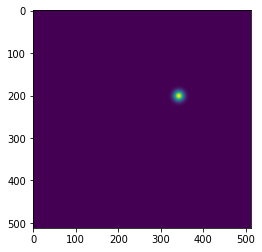

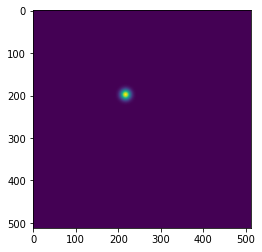

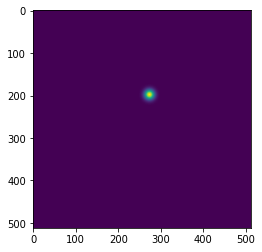

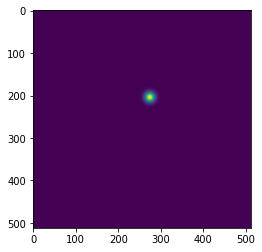

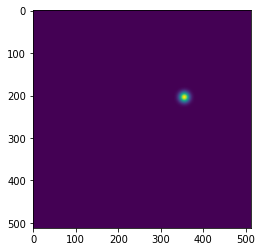

In [12]:
for i in range(12):
    plt.imshow(to_np(target[i:i+1])[...,-1])
    plt.show()